In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
from scipy.stats import pearsonr, spearmanr, wasserstein_distance, chisquare

from mido import MidiFile, MidiTrack, Message
import glob, random
from copy import deepcopy
from tqdm import trange
from numpy import isnan, isinf

In [2]:
# A = np.random.random((10, 1))
# hist_A = np.histogram(A, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# B = np.random.random((10, 1))
# hist_B = np.histogram(B, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# 
# # corr = dist.correlation(hist_A[0], hist_B[0])
# # cosine = dist.cosine(hist_A[0], hist_B[0])
# # pearson, _ = pearsonr(hist_A[0], hist_B[0])
# # spearman, _ = spearmanr(hist_A[0], hist_B[0])
# # chisq = chisquared(hist_A[0], hist_B[0])
# emd = wasserstein_distance(hist_A[0], hist_B[0])
# bhat = bhattacharya(hist_A[0], hist_B[0])

In [3]:
chorale_hists = {}
chorale_files = glob.glob('../HyperDimensional/Datasets/Unprocessed/Chorales/MIDI/UCI/*.mid')
min = 100
max = 0
diff_min = 100
diff_max = 0

for chorale_num, chorale in enumerate(chorale_files):
	chorale = MidiFile(chorale)

	# note_freqs = {}
	notes = []
	diffs = []
	prev_note = None
	for num, message in enumerate(chorale.tracks[0]):
		if message.type == 'note_on' and message.note != 0 and message.velocity != 0:
			notes.append(message.note)
			
			if prev_note is None:
				prev_note = message.note
			else:
				diff = message.note - prev_note
				prev_note = message.note
				diffs.append(diff)
				
				if diff < diff_min:
					diff_min = diff
				if diff > diff_max:
					diff_max = diff

			if message.note < min:
				min = message.note
			if message.note > max:
				max = message.note

	filename = chorale.filename.split('\\')[1].split('.mid')[0]
	chorale_hists[filename] = (notes, diffs)
	chorale_hists['min'] = (min, diff_min)
	chorale_hists['max'] = (max, diff_max)

In [4]:
boring_hists = {}
chorale_files = glob.glob('../HyperDimensional/Datasets/Unprocessed/Chorales/MIDI/BoringChorales/*.mid')
min = 100
max = 0
diff_min = 100
diff_max = 0

for chorale_num, chorale in enumerate(chorale_files):
	chorale = MidiFile(chorale)

	# note_freqs = {}
	notes = []
	diffs = []
	prev_note = None
	for num, message in enumerate(chorale.tracks[0]):
		if message.type == 'note_on' and message.note != 0 and message.velocity != 0:
			notes.append(message.note)
			
			if prev_note is None:
				prev_note = message.note
			else:
				diff = message.note - prev_note
				prev_note = message.note
				diffs.append(diff)
				
				if diff < diff_min:
					diff_min = diff
				if diff > diff_max:
					diff_max = diff

			if message.note < min:
				min = message.note
			if message.note > max:
				max = message.note

	filename = chorale.filename.split('\\')[1].split('.mid')[0]
	boring_hists[filename] = (notes, diffs)
	boring_hists['min'] = (min, diff_min)
	boring_hists['max'] = (max, diff_max)

In [5]:
random_hists = {}
chorale_files = glob.glob('../HyperDimensional/Datasets/Unprocessed/Chorales/MIDI/RandomChorales/*.mid')
min = 100
max = 0
diff_min = 100
diff_max = 0

for chorale_num, chorale in enumerate(chorale_files):
	chorale = MidiFile(chorale)

	# note_freqs = {}
	notes = []
	diffs = []
	prev_note = None
	for num, message in enumerate(chorale.tracks[0]):
		if message.type == 'note_on' and message.note != 0 and message.velocity != 0:
			notes.append(message.note)
			
			if prev_note is None:
				prev_note = message.note
			else:
				diff = message.note - prev_note
				prev_note = message.note
				diffs.append(diff)
				
				if diff < diff_min:
					diff_min = diff
				if diff > diff_max:
					diff_max = diff

			if message.note < min:
				min = message.note
			if message.note > max:
				max = message.note

	filename = chorale.filename.split('\\')[1].split('.mid')[0]
	random_hists[filename] = (notes, diffs)
	random_hists['min'] = (min, diff_min)
	random_hists['max'] = (max, diff_max)

In [6]:
composed_hists = {}
chorale_files = glob.glob('../HyperDimensional/Datasets/Unprocessed/Chorales/MIDI/ComposedChorales/*.mid')
min = 100
max = 0
diff_min = 100
diff_max = 0

for chorale_num, chorale in enumerate(chorale_files):
	chorale = MidiFile(chorale)

	# note_freqs = {}
	notes = []
	diffs = []
	prev_note = None
	for num, message in enumerate(chorale.tracks[0]):
		if message.type == 'note_on' and message.note != 0 and message.velocity != 0:
			notes.append(message.note)
			
			if prev_note is None:
				prev_note = message.note
			else:
				diff = message.note - prev_note
				prev_note = message.note
				diffs.append(diff)
				
				if diff < diff_min:
					diff_min = diff
				if diff > diff_max:
					diff_max = diff

			if message.note < min:
				min = message.note
			if message.note > max:
				max = message.note

	filename = chorale.filename.split('\\')[1].split('.mid')[0]
	composed_hists[filename] = (notes, diffs)
	composed_hists['min'] = (min, diff_min)
	composed_hists['max'] = (max, diff_max)

In [7]:
# print(random_hists['min'], random_hists['max'])
# print(boring_hists['min'], boring_hists['max'])
# print(chorale_hists['min'], chorale_hists['max'])
# print(composed_hists['min'], composed_hists['max'])

del random_hists['min'], random_hists['max']
del boring_hists['min'], boring_hists['max']
del chorale_hists['min'], chorale_hists['max']
del composed_hists['min'], composed_hists['max']

In [8]:
boring_diffs = deepcopy(boring_hists)
random_diffs = deepcopy(random_hists)
chorale_diffs = deepcopy(chorale_hists)
composed_diffs = deepcopy(composed_hists)

for file in boring_hists.keys():
	boring_diffs[file] = np.histogram(np.asarray(boring_hists[file][1]), bins=range(-19, 20))

for file in random_hists.keys():
	random_diffs[file] = np.histogram(np.asarray(random_hists[file][1]), bins=range(-19, 20))

for file in chorale_hists.keys():
	chorale_diffs[file] = np.histogram(np.asarray(chorale_hists[file][1]), bins=range(-19, 20))

for file in composed_hists.keys():
	composed_diffs[file] = np.histogram(np.asarray(composed_hists[file][1]), bins=range(-19, 20))

for file in boring_hists.keys():
	boring_hists[file] = np.histogram(np.asarray(boring_hists[file][0]), bins=range(60, 80))

for file in random_hists.keys():
	random_hists[file] = np.histogram(np.asarray(random_hists[file][0]), bins=range(60, 80))

for file in chorale_hists.keys():
	chorale_hists[file] = np.histogram(np.asarray(chorale_hists[file][0]), bins=range(60, 80))

for file in composed_hists.keys():
	composed_hists[file] = np.histogram(np.asarray(composed_hists[file][0]), bins=range(60, 80))
	


In [9]:
def chisquared(H1: np.ndarray, H2: np.ndarray) -> float:
	assert(H1.size == H2.size)
	
	dist = 0.0
	for value in range(H1.size):
		dist += pow(H1[value] - H2[value], 2) / (H1[value] + H2[value])
		
	return dist


def bhattacharya(H1: np.ndarray, H2: np.ndarray) -> float:
	assert(H1.size == H2.size)
	
	dist = 0.0
	for value in range(H1.size):
		dist += np.sqrt(H1[value] * H2[value])
		
	# dist = -np.log(dist)
		
	return dist


def kl_divergence(H1: np.ndarray, H2: np.ndarray) -> float:
	assert(H1.size == H2.size)
	return sum(H1[i] * np.log2(H1[i]/H2[i]) for i in range(H1.size))


def get_dists(hists_A, hists_B):
	cos = 0
	emd = 0
	bhat = 0
	eucl = 0
	count = 0

	for hist_A in hists_A.values():
		for hist_B in hists_B.values():
			count += 1
			cos_dist = dist.cosine(hist_A[0], hist_B[0])
			cos += cos_dist if not isnan(cos_dist) and not isinf(cos_dist) else 0
			bhat += bhattacharya(hist_A[0], hist_B[0])
			eucl += dist.euclidean(hist_A[0], hist_B[0])
			emd += wasserstein_distance(hist_A[0], hist_B[0])

	return {'eucl': eucl/count, 'bhat': bhat/count, 'emd': emd/count, 'cos': cos/count}


dist_composed_chorale = get_dists(composed_hists, chorale_hists)
dist_chorale_random = get_dists(random_hists, chorale_hists)
dist_chorale_boring = get_dists(boring_hists, chorale_hists)
dist_chorale_chorale = get_dists(chorale_hists, chorale_hists)

diff_composed_chorale = get_dists(composed_diffs, chorale_diffs)
diff_chorale_random = get_dists(random_diffs, chorale_diffs)
diff_chorale_boring = get_dists(boring_diffs, chorale_diffs)
diff_chorale_chorale = get_dists(chorale_diffs, chorale_diffs)

C:\Users\ruchi\Anaconda3\envs\EE510\lib\site-packages\scipy\spatial\distance.py:728: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [33]:
labels = ['ChCo', 'ChB', 'ChR', 'ChCh']
dists = [dist_composed_chorale, dist_chorale_boring, dist_chorale_random, dist_chorale_chorale]
diffs = [diff_composed_chorale, diff_chorale_boring, diff_chorale_random, diff_chorale_chorale]

dist_eucl = [dist['eucl'] for dist in dists]
dist_bhat = [dist['bhat'] for dist in dists]
dist_emd = [dist['emd'] for dist in dists]
dist_cos = [dist['cos'] for dist in dists]

diff_eucl = [diff['eucl'] for diff in diffs]
diff_bhat = [diff['bhat'] for diff in diffs]
diff_emd = [diff['emd'] for diff in diffs]
diff_cos = [diff['cos'] for diff in diffs]

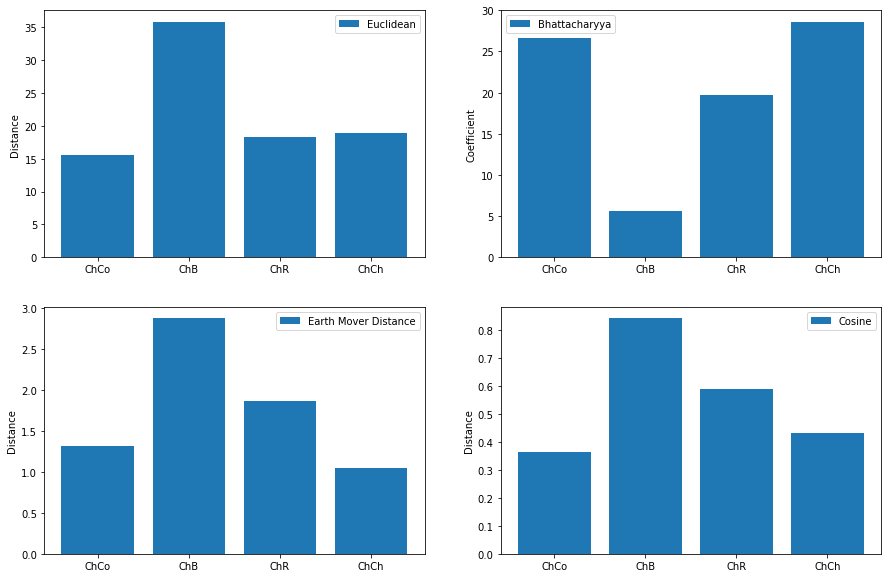

In [42]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2,2)
rects1 = ax[0][0].bar(x, dist_eucl,  label='Euclidean')
rects2 = ax[0][1].bar(x, dist_bhat,  label='Bhattacharyya')
rects3 = ax[1][0].bar(x, dist_emd,  label='Earth Mover Distance')
rects4 = ax[1][1].bar(x, dist_cos,  label='Cosine')

# Add some text for labels, title and custom x-axis tick labels, etc.


for axs in [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]:
	axs.set_ylabel('Distance')
	# ax.set_title('Distance measure for chorales, compositions, random and boring samples')
	axs.set_xticks(x)
	axs.set_xticklabels(labels)
	axs.legend()
	
ax[0][1].set_ylabel('Coefficient')

# fig.tight_layout()
fig.set_size_inches(15, 10)
plt.savefig('Stat_Distances.jpg', dpi=100)

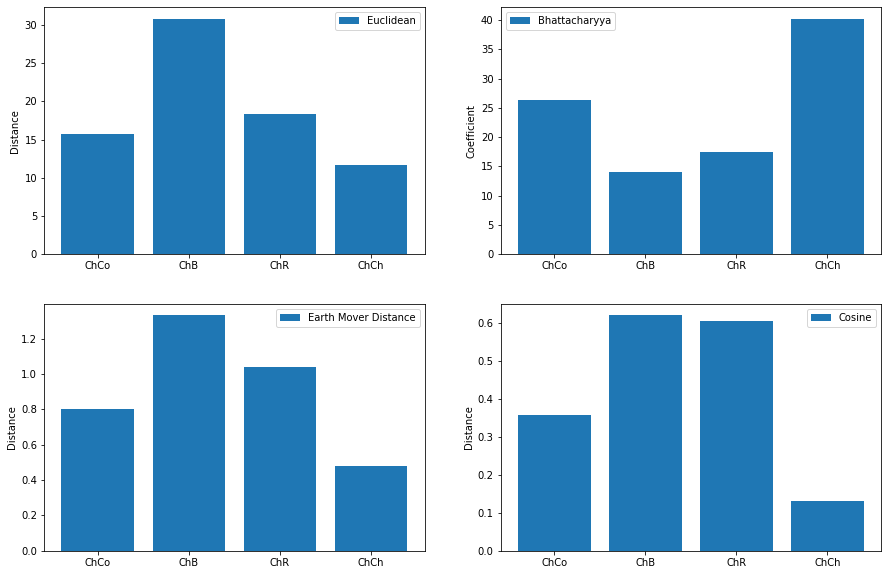

In [43]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2,2)
rects1 = ax[0][0].bar(x, diff_eucl, label='Euclidean')
rects2 = ax[0][1].bar(x, diff_bhat, label='Bhattacharyya')
rects3 = ax[1][0].bar(x, diff_emd, label='Earth Mover Distance')
rects4 = ax[1][1].bar(x, diff_cos, label='Cosine')

# Add some text for labels, title and custom x-axis tick labels, etc.


for axs in [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]:
	axs.set_ylabel('Distance')
	# ax.set_title('Distance measure for chorales, compositions, random and boring samples')
	axs.set_xticks(x)
	axs.set_xticklabels(labels)
	axs.legend()
	
ax[0][1].set_ylabel('Coefficient')

# fig.tight_layout()
fig.set_size_inches(15, 10)
plt.savefig('Stat_Differences.jpg', dpi=100)
